## Lab:1 - My Summary

Load Data

In [2]:
import pandas as pd                               # For working with datasets (loading, cleaning, etc.)
import numpy as np

In [3]:
df = pd.read_csv("/content/airline_satisfaction_missing.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,target
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


In [5]:
df.shape

(103904, 26)

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


### EDA
- Get 2-3 factors impacting target

In [11]:
# Target count
x= df['target'].value_counts()
percentage = x/len(df)*100
print(percentage)
# The dataset is reasonably balanced, with a slightly higher proportion of not satisfied passengers.

target
0    56.666731
1    43.333269
Name: count, dtype: float64


In [12]:
df.shape

(103904, 26)

In [14]:
# dropping column
non_feature_columns = ["Unnamed: 0", "id", "satisfaction", "target"]
df_new = df.drop(non_feature_columns, axis=1)
df_new.head()
df_new.shape

(103904, 22)

In [15]:
# types of data and category split
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [29]:
df.dtypes.to_string()

'Unnamed: 0                             int64\nid                                     int64\nGender                                object\nCustomer Type                         object\nAge                                    int64\nType of Travel                        object\nClass                                 object\nFlight Distance                        int64\nInflight wifi service                  int64\nDeparture/Arrival time convenient      int64\nEase of Online booking                 int64\nGate location                          int64\nFood and drink                         int64\nOnline boarding                        int64\nSeat comfort                         float64\nInflight entertainment                 int64\nOn-board service                       int64\nLeg room service                       int64\nBaggage handling                       int64\nCheckin service                        int64\nInflight service                       int64\nCleanliness                      

In [34]:
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns,type(categorical_columns))
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns,type(categorical_columns))

numerical_columns = df_new.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns,type(numerical_columns))

['Gender', 'Customer Type', 'Type of Travel', 'Class'] <class 'list'>
['Gender', 'Customer Type', 'Type of Travel', 'Class'] <class 'list'>
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] <class 'list'>


Missing Values Fixes
: Numerical columns : median se replace
: Categorical columns : mode se replace

In [ ]:
df_new.isna().sum()

Handling Missing Values:
- use imputers for columns
- df[column].fillna() method can be used too

In [40]:
df['Seat comfort'].isnull().sum()

np.int64(1039)

In [42]:
df['Gender'].mode()

'Female'

In [ ]:
# My style of handling missing values
for item in numerical_columns:
  print(item)
  df[item].fillna(df[item].median(), inplace=True)

for item in categorical_columns:
  print(item)
  df[item].fillna(df[item].mode()[0], inplace=True)

Using Imputers for missing values
- For each numeric column in num_data:

  Compute the median (since you set strategy="median").

  Store these medians inside the imputer object.

- But fit_transform() always returns a NumPy array, not a DataFrame.

  Shape = (n_samples, n_features)

  Column names are lost.

  Need to wrap in pd.Dataframe()

In [47]:
# Split the dataset into numeric and categorical subsets
num_data = df[numerical_columns]
cat_data = df[categorical_columns]
cat_data.head()
print(type(num_data))

<class 'pandas.core.frame.DataFrame'>


In [48]:
from sklearn.impute import SimpleImputer

In [51]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

a = num_imputer.fit_transform(num_data)
# all missing values are handled
b = cat_imputer.fit_transform(cat_data)

print(a,type(a))

[[1.300e+01 4.600e+02 3.000e+00 ... 5.000e+00 2.500e+01 1.800e+01]
 [2.500e+01 2.350e+02 3.000e+00 ... 1.000e+00 1.000e+00 6.000e+00]
 [2.600e+01 1.142e+03 2.000e+00 ... 5.000e+00 0.000e+00 0.000e+00]
 ...
 [3.000e+01 1.995e+03 1.000e+00 ... 4.000e+00 7.000e+00 1.400e+01]
 [2.200e+01 1.000e+03 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.700e+01 1.723e+03 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]] <class 'numpy.ndarray'>


Convert numpy to dataframe with name

In [ ]:
num_df = pd.DataFrame(a, columns=numerical_columns)
cat_df = pd.DataFrame(b, columns=categorical_columns)
cat_data.isna().sum()
# Maam one line num_imputed = pd.DataFrame(num_imputer.fit_transform(num_data), columns=numeric_features)

Can mix these columns together now

In [78]:
# Combine the imputed DataFrames
df_after_imputation = pd.concat([num_df,cat_df],axis=1)
# axis=1 → concatenate columns (stack data horizontally)
df_after_imputation.isnull().sum().sum()

np.int64(0)

In [ ]:
# adding target column too
df_after_imputation['target'] = df['target']
df_after_imputation.head()

Remaining Missing Values: 0
The dataset is now complete and ready for further analysis.

### Plot for univariate, bivariate, multivariate

Univariate:  one feature at a time to understand its basic behavior, things like distribution, central values (mean/median), spread, and outliers.

In [62]:
# Choose 3 features to analyze
selected_features = ["Arrival Delay in Minutes", "Seat comfort", "Inflight entertainment"]

for item in selected_features:
  print("Means",df_after_imputation[item].mean())
  print("Median",df_after_imputation[item].median())
  print("Mode",df_after_imputation[item].mode()[0])

Means 14.976949876809362
Median 0.0
Mode 0.0
Means 3.4443139821373574
Median 4.0
Mode 4.0
Means 3.358157530027718
Median 4.0
Mode 4.0


Plotting Histogram

In [64]:
from matplotlib import pyplot as plt

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

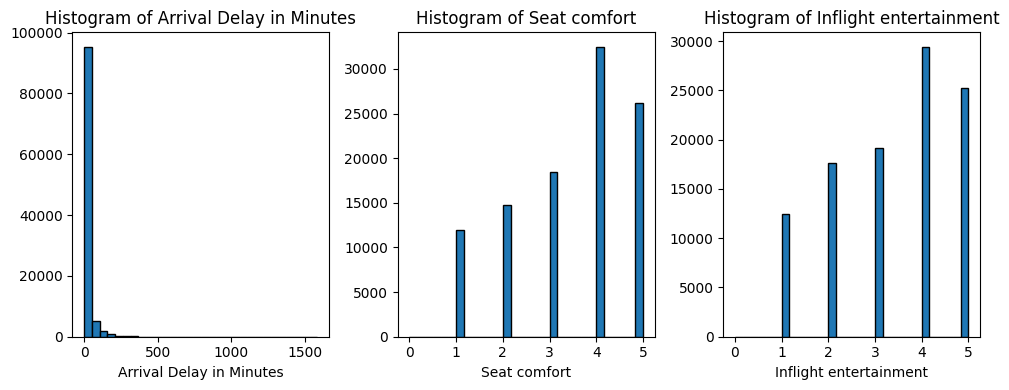

In [73]:
# Set up histogram plotting
plt.figure(figsize=(10, 4))
for i,item in enumerate(selected_features,1):
  plt.subplot(1,3,i) # this is the position of that subplot
  plt.hist(df_after_imputation[item], bins=30, edgecolor='k')
  # bins=3 → divide the data range (1–6) into 3 equal-width intervals:
  plt.title(f'Histogram of {item}')
  plt.xlabel(item)
plt.tight_layout()
plt.show()

Mean median mode and histogram decide help which feature is good
Like here arrival delay median is 0 and mean is 14 histogram shows most values at zero: median is good indicator here


Bivariate: Feature vs target (clear distinction hai then good)
-  If clear differences exist, that feature is likely a good predictor of satisfaction.
- Why Median + Boxplots?

  Median provides a simple numeric summary of the central value for each group.
  Boxplots show the full distribution, spread, and outliers.
- If Arrival Delay in Minutes looks similar in both groups, it might not be very informative for satisfaction.”

In [90]:
features_to_check = ["Arrival Delay in Minutes", "Seat comfort", "Inflight entertainment"]

normal = df_after_imputation[features_to_check].median()
print(normal)
# creating two rows
median = df_after_imputation.groupby('target')[features_to_check].median()
print(median)

#  take transpose for column to be target 0 and 1
median.T

Arrival Delay in Minutes    0.0
Seat comfort                4.0
Inflight entertainment      4.0
dtype: float64
        Arrival Delay in Minutes  Seat comfort  Inflight entertainment
target                                                                
0                            0.0           3.0                     3.0
1                            0.0           4.0                     4.0


target,0,1
Arrival Delay in Minutes,0.0,0.0
Seat comfort,3.0,4.0
Inflight entertainment,3.0,4.0


In [91]:
import seaborn as sns
# for boxplot
# box plot automatically shows median lines as well

In [ ]:
sns.boxenplot(x='target',y='Arrival Delay in Minutes',data=df_after_imputation, palette="coolwarm", legend=False)
# one liner

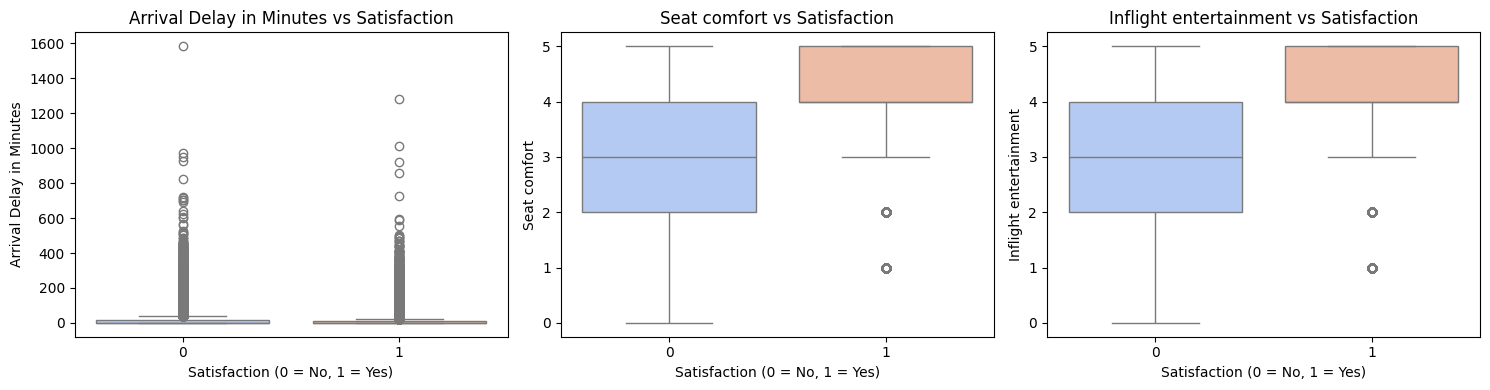

In [96]:
# Boxplots to visualize distributions
plt.figure(figsize=(15, 4))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="target", y=col, hue="target", data=df_after_imputation, palette="coolwarm", legend=False)
    plt.title(f"{col} vs Satisfaction")
    plt.xlabel("Satisfaction (0 = No, 1 = Yes)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Here it is clearing visible that seat comfort and inflight entertainment values are distributed and dont overlay with target 0 and 1

In [98]:
# coding se get values of feature without grouping by
df_target0= df_after_imputation[df['target']==0]
df_target1= df_after_imputation[df['target']==1]
features_to_check = ["Arrival Delay in Minutes", "Seat comfort", "Inflight entertainment"]
for item in features_to_check:
  print(item)
  print(df_target0[item].median(),df_target1[item].median())

Arrival Delay in Minutes
0.0 0.0
Seat comfort
3.0 4.0
Inflight entertainment
3.0 4.0


Multivariate Analysis (Feature ↔ Feature)
- using correlation map
- also covariance matrix is used inside pca

<Figure size 1200x1000 with 0 Axes>

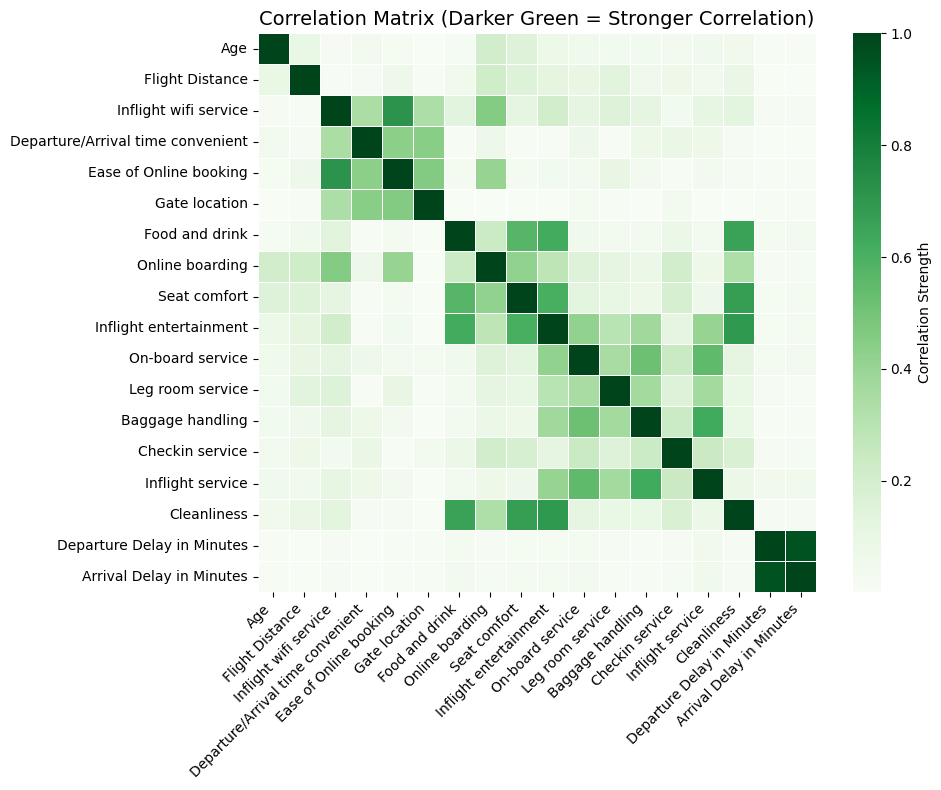

In [99]:
# Compute correlation matrix for numeric features
correlation_matrix = df_after_imputation[numerical_columns].corr()
# sns plot

plt.figure(figsize=(12, 10))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix.abs(),
    cmap="Greens",
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation Strength"},
    annot=False  # no numbers on the cells
)

plt.title("Correlation Matrix (Darker Green = Stronger Correlation)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Printing high correlated values [>0.7]

In [105]:
print(correlation_matrix['Age']['Age'])
print(correlation_matrix.columns)


1.0
Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [112]:
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
  for j in range(1+i,len(correlation_matrix.columns)):
    if(abs(correlation_matrix.iloc[i,j])>=0.7 and i != j):
      high_corr_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j],correlation_matrix.iloc[i,j]))

for item in high_corr_pairs:
  print(item)

('Inflight wifi service', 'Ease of Online booking', np.float64(0.715856141267444))
('Departure Delay in Minutes', 'Arrival Delay in Minutes', np.float64(0.9542911249037782))


## PCA: Dimensional Reduction from the exisiting feature
- Need x and standarize value
- correlation matrix use to get those pc1 pc2 values

In [113]:
X = df_after_imputation[numerical_columns]
# all are in numeric ignoring categorical columns as they need one hot encoding these things
y= df_after_imputation['target']

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [120]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(103904, 18)


In [119]:
#PCA create
pca = PCA()
X_pca= pca.fit_transform(X_scaled)
print(X_pca.shape)

(103904, 18)


In [130]:
X_pca[:,0]
# pc1 value uska column basically for all features

array([ 2.10496148, -3.32373162,  2.12622916, ...,  0.23986399,
       -3.42896356, -4.08258099])

In [121]:
# finding PC1 component and variance it contribute to
# basically lambda values
# Explained variance
explained_var = pca.explained_variance_ratio_
# Print explained variance info
print("Explained variance per component:", explained_var)

# Cumulative explained variance
cumulative_var = explained_var.cumsum()
print("\nCumulative explained variance:", cumulative_var)

Explained variance per component: [0.21429043 0.13126712 0.12097086 0.10841106 0.06915531 0.05350425
 0.05155848 0.04953322 0.03842365 0.02965194 0.02660483 0.02493961
 0.02040391 0.01796918 0.01655368 0.01392931 0.01029534 0.00253783]

Cumulative explained variance: [0.21429043 0.34555755 0.46652841 0.57493947 0.64409477 0.69759903
 0.74915751 0.79869073 0.83711439 0.86676632 0.89337115 0.91831076
 0.93871466 0.95668385 0.97323753 0.98716683 0.99746217 1.        ]


PC1 explains ~21% of the variance in the data.
PC2 explains ~13% of the variance in the data.
PC3 explains ~12% of the variance in the data.
Together, the first 8 components explain ~80% of the variance.

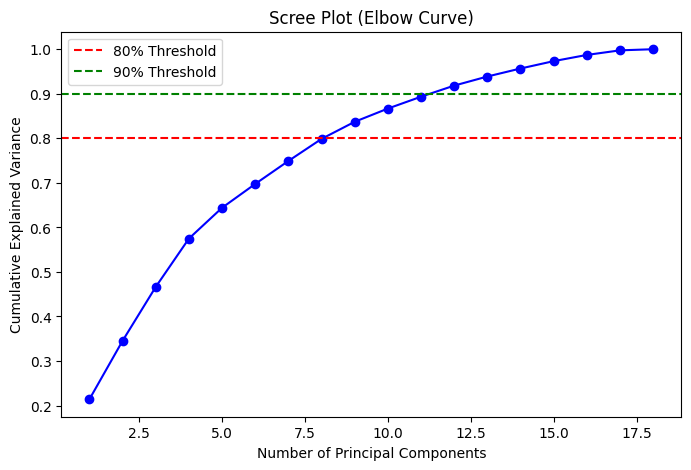

In [124]:
# Plot this variance data
# A scree plot shows how much variation in the data is explained by each principal component.

# Plot the cumulative explained variance (scree plot)
plt.figure(figsize=(8, 5))
# x and y in data
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker="o", color="blue")
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Elbow Curve)")
plt.legend()
plt.show()

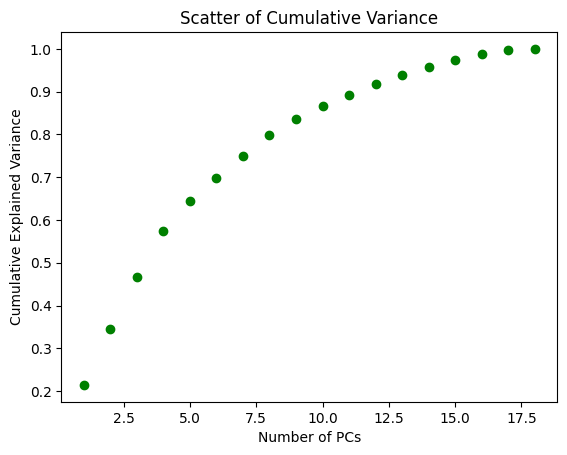

In [125]:
plt.scatter(range(1, len(cumulative_var)+1), cumulative_var, color="green")
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scatter of Cumulative Variance")
plt.show()

Since all data rows 18 featues -> PCA 18 columns
Taking PC1 and PC2 values show 50% of data variance lets say

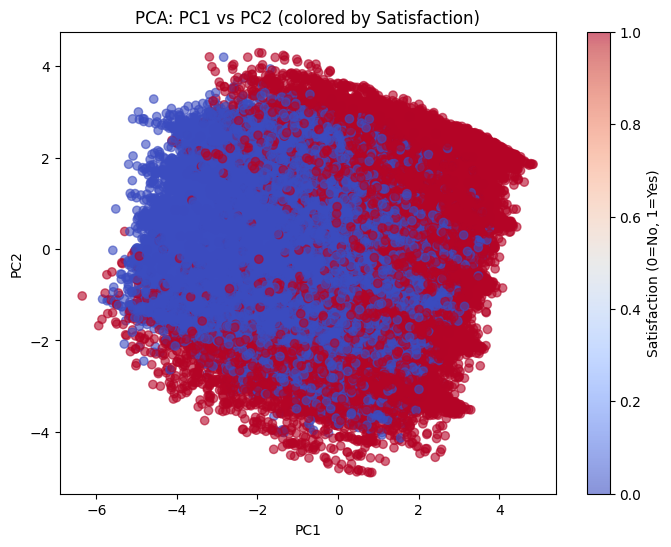

In [133]:
# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
# X_pca[:, 0] = coordinates of each point along PC1

# X_pca[:, 1] = coordinates along PC2
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.6)
# alpha overlapping appear darker
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2 (colored by Satisfaction)")
plt.colorbar(label="Satisfaction (0=No, 1=Yes)")
plt.show()

PC1 vs PC2 Scatter Plot:
PC1 PC2 and Y(give 0 blue and 1 red) and plot pc1 and pc2 on axis

The two groups overlap a lot, which means satisfaction is influenced by many factors and cannot be separated perfectly in just two dimensions.
Still, there is a visible trend: more red points appear toward the right, while more blue points cluster toward the left.

PC1 = eigen vector * first row so eigen vectors tell the weight for each feature
Principal Component Equations
PC1=0.42×Inflight entertainment+0.35×Cleanliness+0.34×Seat comfort+0.30×Food and drink+0.29×Online boarding

PC2=0.54×Ease of Online booking+0.45×Inflight wifi service+0.43×Gate location+0.42×Departure/Arrival time convenient−0.18×Inflight entertainment

In [140]:
pca.components_.shape
# these are eigen vectors basically 18 eigen vectors each [18 values to get multiply by each feature in df]
# pca.components_[0] PC1(v1) PC2(v2)
# that why we are doing .T
# pca.components_ =
# [[ 0.5, 0.5, 0.7],   # PC1
#  [ 0.7, -0.2, 0.6]]  # PC2

array([ 0.07131588,  0.11956698,  0.23148914,  0.09958907,  0.1630794 ,
        0.06445308,  0.30187691,  0.28712409,  0.34431827,  0.42207885,
        0.27496179,  0.22071764,  0.255218  ,  0.18144483,  0.25910401,
        0.35135566, -0.03821606, -0.04078093])

In [142]:
# Step 8: Communicate Results

# Top loadings (features contributing most to each principal component)
# print(pca.components_) # this is for each row all pca values
loadings = pd.DataFrame(
    # converting pca values in columns thats why
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_var))],
    index=X.columns
    # index parameter sets the row labels of a DataFrame.
)
print(loadings.head())
# eigen vectors values basically what we multiply

# Display top contributing features for PC1 and PC2
print("\nTop contributing features for PC1:")
print(loadings["PC1"].sort_values(key=abs, ascending=False).round(2).head(5))

print("\nTop contributing features for PC2:")
print(loadings["PC2"].sort_values(key=abs, ascending=False).round(2).head(5))

                                        PC1       PC2       PC3       PC4  \
Age                                0.071316  0.010865 -0.102264 -0.009215   
Flight Distance                    0.119567 -0.019901 -0.011152  0.021813   
Inflight wifi service              0.231489  0.449560 -0.041936 -0.013635   
Departure/Arrival time convenient  0.099589  0.417287  0.028163 -0.008587   
Ease of Online booking             0.163079  0.536480 -0.043791 -0.015803   

                                        PC5       PC6       PC7       PC8  \
Age                                0.525585  0.374152 -0.422244 -0.558574   
Flight Distance                    0.486668 -0.137753 -0.362984  0.729557   
Inflight wifi service              0.013987 -0.279219  0.209037 -0.148892   
Departure/Arrival time convenient -0.194118  0.437040 -0.161855  0.090838   
Ease of Online booking             0.050218 -0.186188  0.100345 -0.013918   

                                        PC9      PC10      PC11      PC12 

Airline Passenger Satisfaction Insights
1. **Comfort & Service Quality (Most Important)**  
   - Things like inflight entertainment, cleanliness, seat comfort, and food & drink.  
   - These features make up most of **PC1 (~21% of variance)**.  
   - Better comfort and service make passengers more satisfied.

2. **Digital & Travel Experience (Second Most Important)**  
   - Includes online booking, inflight Wi-Fi, gate location, and schedule convenience.  
   - These show up strongly in **PC2 (~13% of variance)**.  
   - Better digital touchpoints mean happier passengers.